In [2]:
import sqlite3
import pandas as pd

# Create the connection
cnx = sqlite3.connect(r'./database.sqlite')

# create the dataframe from a query
df_participants = pd.read_sql_query("SELECT * FROM participants", cnx)
df_runs = pd.read_sql_query("SELECT * FROM runs", cnx)
df_positions = pd.read_sql_query("SELECT * FROM positions", cnx)


# remove invalid entries (1-4 = testing, 14 is pid 10 (aborted study)) 
df_runs_filtered = df_runs[(df_runs.participant_id != 1) & (df_runs.participant_id != 2) & (df_runs.participant_id != 3) & (df_runs.participant_id != 4) & (df_runs.participant_id != 14)]

# participant_id 5,6 -> 39 entries
# participant_id 21 -> 37 entries


In [3]:
df_positions.head()

,id,x,y,z
0,1,357.665863,11.297280,10.094984
1,2,355.455933,7.994468,354.065216
2,3,353.392059,4.533486,356.326111
3,4,356.404785,5.901930,355.644470
4,5,-0.167264,-1.950000,-2.197365


In [4]:
# participant_id 5,6 -> 39 entries
# participant_id 21 -> 37 entries
# happens through restarted conditions (because technical problems in a secific conditions)
# but we are only interested in the coordinates of the interactive gestures -> again remove not needed entries

df_runs_filtered = df_runs_filtered[(df_runs_filtered.custom_position_id != 0) | (df_runs_filtered.custom_direction_id != 0)]

In [5]:
df_runs_filtered.head()

,id,participant_id,custom_position_id,custom_direction_id,point_of_reference,placement,scenario,avatar_gender,started,finished,call_started,call_answered
50,51,5,0,15,FieldOfView,Interactive,Stationary,Female,2019-1-12 12:32:17.634,2019-1-12 12:33:30.940,2019-1-12 12:32:20.277,2019-1-12 12:32:59.689
51,52,5,0,16,FieldOfView,Interactive,Stationary,Male,2019-1-12 12:33:32.270,2019-1-12 12:34:27.950,2019-1-12 12:33:33.395,2019-1-12 12:33:53.470
52,53,5,17,0,FixedInSpace,Interactive,Mobile,Female,2019-1-12 12:41:1.801,2019-1-12 12:43:20.339,2019-1-12 12:41:7.908,2019-1-12 12:42:50.339
53,54,5,18,0,FixedInSpace,Interactive,Mobile,Male,2019-1-12 12:43:21.853,2019-1-12 12:44:41.906,2019-1-12 12:43:27.332,2019-1-12 12:44:8.675
62,63,5,19,0,Relative,Interactive,Stationary,Male,2019-1-12 13:30:24.679,2019-1-12 13:31:48.454,2019-1-12 13:30:27.244,2019-1-12 13:31:15.90


In [6]:
df_runs_filtered.count()

id                     217
participant_id         217
custom_position_id     217
custom_direction_id    217
point_of_reference     217
placement              217
scenario               217
avatar_gender          217
started                217
finished               217
call_started           217
call_answered          217
dtype: int64

In [7]:
df_runs_filtered.set_index(["id", "participant_id"]).count(level="participant_id")

,custom_position_id,custom_direction_id,point_of_reference,placement,scenario,avatar_gender,started,finished,call_started,call_answered
participant_id,,,,,,,,,,
5,12,12,12,12,12,12,12,12,12,12
6,13,13,13,13,13,13,13,13,13,13
7,12,12,12,12,12,12,12,12,12,12
8,12,12,12,12,12,12,12,12,12,12
9,12,12,12,12,12,12,12,12,12,12
10,12,12,12,12,12,12,12,12,12,12
11,12,12,12,12,12,12,12,12,12,12
12,12,12,12,12,12,12,12,12,12,12
13,12,12,12,12,12,12,12,12,12,12


In [8]:
# entry with participant_id 6 as one etrie more as possible
# so print the entries of participant_id 6 for visual check what happens there
print(df_runs_filtered.loc[df_runs_filtered.participant_id == 6])

      id  participant_id  custom_position_id  custom_direction_id  \
88    89               6                  27                    0   
89    90               6                  28                    0   
94    95               6                   0                   29   
95    96               6                   0                   30   
100  101               6                  31                    0   
101  102               6                  32                    0   
106  107               6                  33                    0   
107  108               6                  34                    0   
112  113               6                   0                   35   
113  114               6                   0                   36   
114  115               6                   0                   37   
119  120               6                  38                    0   
120  121               6                  39                    0   

    point_of_reference    placeme

In [9]:
df_runs_filtered['started'] = pd.to_datetime(df_runs_filtered['started'])
df_runs_filtered['finished'] = pd.to_datetime(df_runs_filtered['finished'])
df_runs_filtered['call_started'] = pd.to_datetime(df_runs_filtered['call_started'])
df_runs_filtered['call_answered'] = pd.to_datetime(df_runs_filtered['call_answered'])
df_runs_filtered.dtypes

id                              int64
participant_id                  int64
custom_position_id              int64
custom_direction_id             int64
point_of_reference             object
placement                      object
scenario                       object
avatar_gender                  object
started                datetime64[ns]
finished               datetime64[ns]
call_started           datetime64[ns]
call_answered          datetime64[ns]
dtype: object

In [10]:
import datetime, time
df_runs_filtered['total_time'] = (df_runs_filtered.finished - df_runs_filtered.started)
df_runs_filtered['call_started_time'] = (df_runs_filtered.call_started - df_runs_filtered.started)
df_runs_filtered['call_answered_time'] = (df_runs_filtered.call_answered - df_runs_filtered.call_started)
df_runs_filtered['total_time_seconds'] = df_runs_filtered['total_time'].dt.total_seconds()
df_runs_filtered['call_start_seconds'] = df_runs_filtered['call_started_time'].dt.total_seconds()
df_runs_filtered['call_answered_seconds'] = df_runs_filtered['call_answered_time'].dt.total_seconds()

print(df_runs_filtered)

      id  participant_id  custom_position_id  custom_direction_id  \
50    51               5                   0                   15   
51    52               5                   0                   16   
52    53               5                  17                    0   
53    54               5                  18                    0   
62    63               5                  19                    0   
..   ...             ...                 ...                  ...   
705  706              23                 233                    0   
706  707              23                 234                    0   
707  708              23                 235                    0   
716  717              23                   0                  236   
717  718              23                   0                  237   

    point_of_reference    placement    scenario avatar_gender  \
50         FieldOfView  Interactive  Stationary        Female   
51         FieldOfView  Interactive  Stat

In [18]:
print(df_runs_filtered.loc[df_runs_filtered.participant_id == 6])


      id  participant_id  custom_position_id  custom_direction_id  \
88    89               6                  27                    0   
89    90               6                  28                    0   
94    95               6                   0                   29   
95    96               6                   0                   30   
100  101               6                  31                    0   
101  102               6                  32                    0   
106  107               6                  33                    0   
107  108               6                  34                    0   
112  113               6                   0                   35   
113  114               6                   0                   36   
114  115               6                   0                   37   
119  120               6                  38                    0   
120  121               6                  39                    0   

    point_of_reference    placeme

In [19]:
merged_positions = pd.merge(left=df_runs_filtered, right=df_positions, left_on='custom_position_id', right_on='id')
merged_directions = pd.merge(left=df_runs_filtered, right=df_positions, left_on='custom_direction_id', right_on='id')

In [20]:
print(df_runs_filtered.loc[df_runs_filtered.participant_id == 6])

      id  participant_id  custom_position_id  custom_direction_id  \
88    89               6                  27                    0   
89    90               6                  28                    0   
94    95               6                   0                   29   
95    96               6                   0                   30   
100  101               6                  31                    0   
101  102               6                  32                    0   
106  107               6                  33                    0   
107  108               6                  34                    0   
112  113               6                   0                   35   
113  114               6                   0                   36   
114  115               6                   0                   37   
119  120               6                  38                    0   
120  121               6                  39                    0   

    point_of_reference    placeme

In [21]:
print(merged_positions.loc[merged_positions.participant_id == 6])

    id_x  participant_id  custom_position_id  custom_direction_id  \
8     89               6                  27                    0   
9     90               6                  28                    0   
10   101               6                  31                    0   
11   102               6                  32                    0   
12   107               6                  33                    0   
13   108               6                  34                    0   
14   120               6                  38                    0   
15   121               6                  39                    0   

   point_of_reference    placement    scenario avatar_gender  \
8        FixedInSpace  Interactive      Mobile          Male   
9        FixedInSpace  Interactive      Mobile        Female   
10           Relative  Interactive      Mobile          Male   
11           Relative  Interactive      Mobile        Female   
12           Relative  Interactive  Stationary          Ma

In [22]:
print(merged_directions.loc[merged_directions.participant_id == 6])

   id_x  participant_id  custom_position_id  custom_direction_id  \
4    95               6                   0                   29   
5    96               6                   0                   30   
6   113               6                   0                   35   
7   114               6                   0                   36   
8   115               6                   0                   37   

  point_of_reference    placement    scenario avatar_gender  \
4        FieldOfView  Interactive  Stationary          Male   
5        FieldOfView  Interactive  Stationary        Female   
6        FieldOfView  Interactive      Mobile          Male   
7        FieldOfView  Interactive      Mobile        Female   
8        FieldOfView  Interactive      Mobile          Male   

                  started                finished  ...      total_time  \
4 2019-01-12 16:04:22.836 2019-01-12 16:05:32.861  ... 00:01:10.025000   
5 2019-01-12 16:05:33.773 2019-01-12 16:06:20.970  ... 00:00:47.

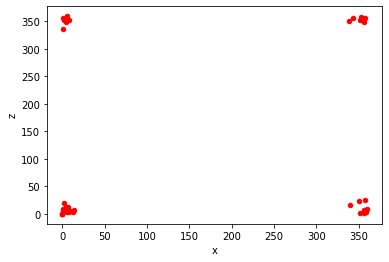

In [79]:
import matplotlib.pyplot as plt
merged_directions.loc[(merged_directions.scenario == 'Mobile')].plot(kind='scatter',x='x',y='z',color='red')
plt.show()

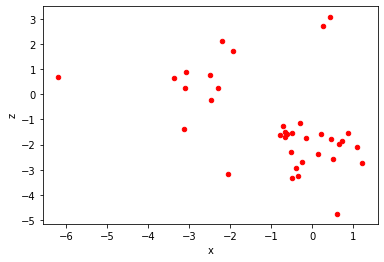

In [76]:
merged_positions.loc[(merged_positions.scenario == 'Stationary') & (merged_positions.point_of_reference == 'Relative')].plot(kind='scatter',x='x',y='z',color='red')
plt.show()

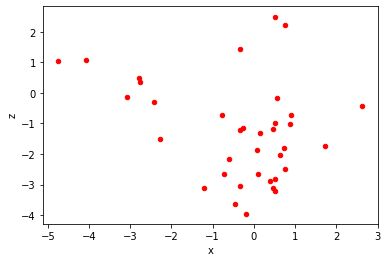

In [77]:
merged_positions.loc[(merged_positions.scenario == 'Stationary') & (merged_positions.point_of_reference == 'FixedInSpace')].plot(kind='scatter',x='x',y='z',color='red')
plt.show()

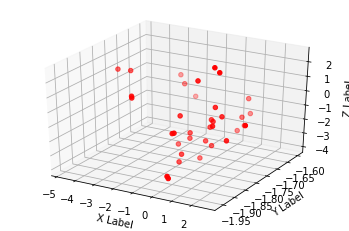

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =merged_positions.loc[(merged_positions.scenario == 'Stationary') & (merged_positions.point_of_reference == 'FixedInSpace')].x
y =merged_positions.loc[(merged_positions.scenario == 'Stationary') & (merged_positions.point_of_reference == 'FixedInSpace')].y
z =merged_positions.loc[(merged_positions.scenario == 'Stationary') & (merged_positions.point_of_reference == 'FixedInSpace')].z



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()